### Задание 1. Загрузите файл HR.csv в pandas dataframe

Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#from sklearn.datasets import load_boston
#from sklearn.linear_model import LinearRegression

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 11,7

df = pd.read_csv('HR.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой
2. last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_montly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел, в котором работает сотрудник
10. salary​ - относительный уровень зарплаты


###Задание 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
# Моды — рассчитаем для всех, хотя предпочтительнее их смотреть для категориальных величин
print('satisfaction_level:', df['satisfaction_level'].mode()[0])
print('last_evaluation:', df['last_evaluation'].mode()[0])
print('number_project:', df['number_project'].mode()[0])
print('average_montly_hours:', df['average_montly_hours'].mode()[0])
print('time_spend_company:', df['time_spend_company'].mode()[0])
print('Work_accident:', df['Work_accident'].mode()[0])
print('left:', df['left'].mode()[0])
print('promotion_last_5years:', df['promotion_last_5years'].mode()[0])
print('department:', df['department'].mode()[0])
print('salary​:', df['salary'].mode()[0])

satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4
average_montly_hours: 135
time_spend_company: 3
Work_accident: 0
left: 0
promotion_last_5years: 0
department: sales
salary​: low


###Задание 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

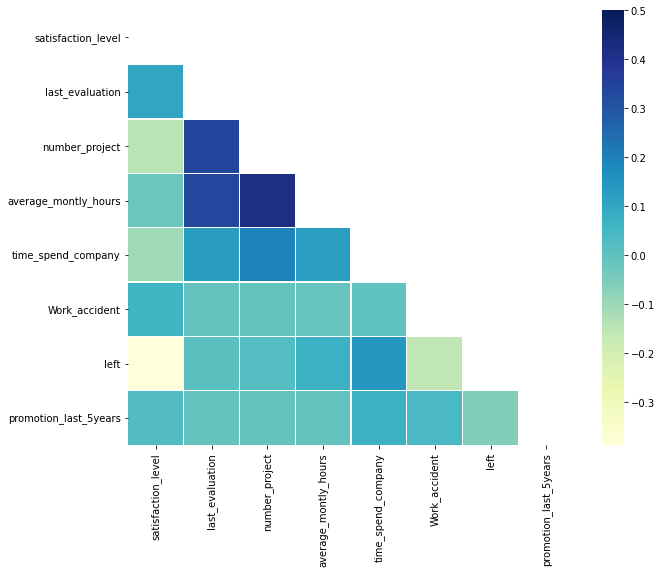

In [16]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            linewidths=.2, cmap="YlGnBu") #coolwarm

**Самые скоррелированные:**

last_evaluation ​- Время с момента последней оценки в годах

и

average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц 

они зависят от 

number_projects​ - Количество проектов, выполненных за время работы 

**Наименее скоррелированные:**

satisfaction_level​ - Уровень удовлетворенности работой

и

work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

они зависят от

left​ - уволился ли сотрудник

###Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте

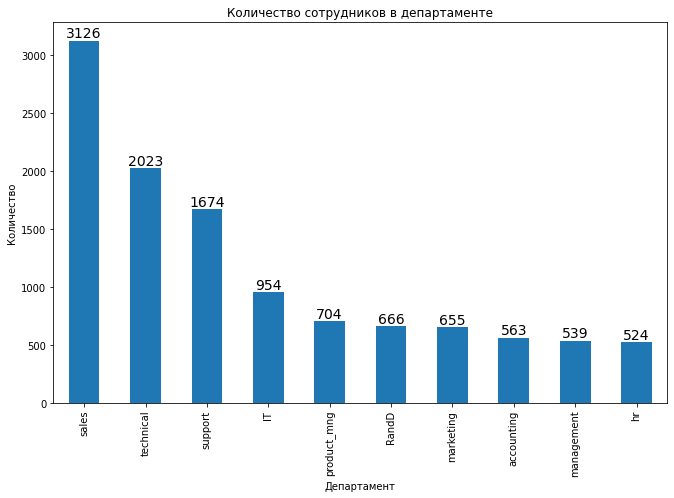

In [18]:
# Отбираем только работающих
data = df[df['left'] == 0]['department'].value_counts()

data.plot(kind='bar', 
          title='Количество сотрудников в департаменте',
          xlabel='Департамент',
          ylabel='Количество')

for i, val in enumerate(data.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

###Задание 5. Показать распределение сотрудников по зарплатам

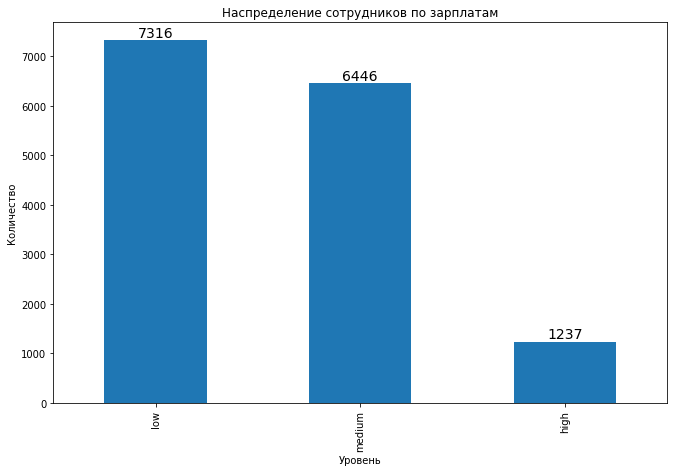

In [19]:
data = df['salary'].value_counts()

data.plot(kind='bar', 
          title='Hаспределение сотрудников по зарплатам',
          xlabel='Уровень',
          ylabel='Количество')

for i, val in enumerate(data.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

###Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

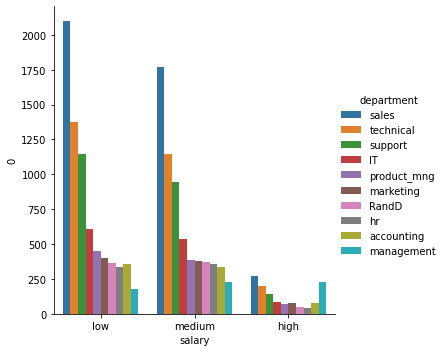

In [20]:
data = df[['department','salary']].value_counts().reset_index()
sns.catplot(x='salary', y=0, hue='department', kind='bar', data=data)

### Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

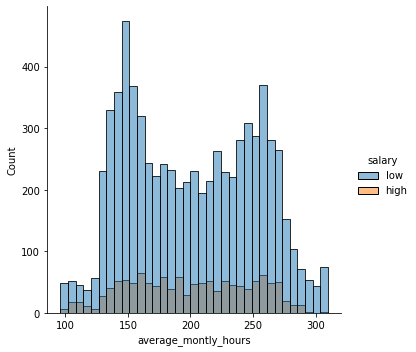

In [21]:
sub_data = df[(df['salary'] == 'high')|(df['salary'] == 'low')]
sns.displot(sub_data, x = 'average_montly_hours', hue = 'salary', bins = 35)

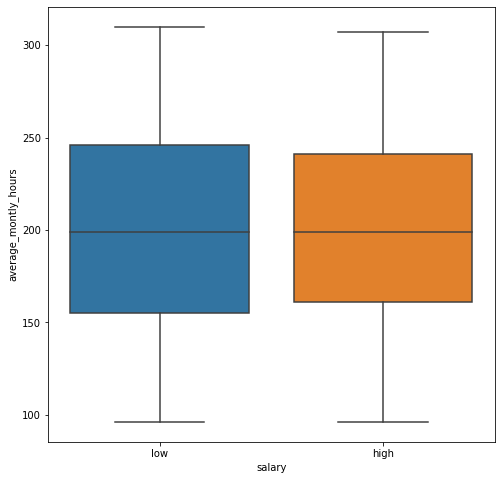

In [22]:
plt.figure(figsize = (8,8))
sns.boxplot(data = sub_data, x = 'salary', y = 'average_montly_hours')

In [23]:
from scipy import stats
t_value, p_value = stats.ttest_ind(high_salary, low_salary)

print('t_value =', t_value, '\np_value =', p_value, 'или', round(p_value*100), '%')

t_value = -0.7288680398062308 
p_value = 0.4661023478267259 или 47 %


Визуально можно увидеть, что среднее время проведения на рабочем месте в обоих группах одинаковое.
Гипотеза возвращает значение 0.4661023478267259 или 47%. Это намного больше 5% порога значимости. Можно утверждать, что уровень оклада не влияет на количество часов на рабочем месте.

###Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

Доля сотрудников с повышением за последние 5 лет

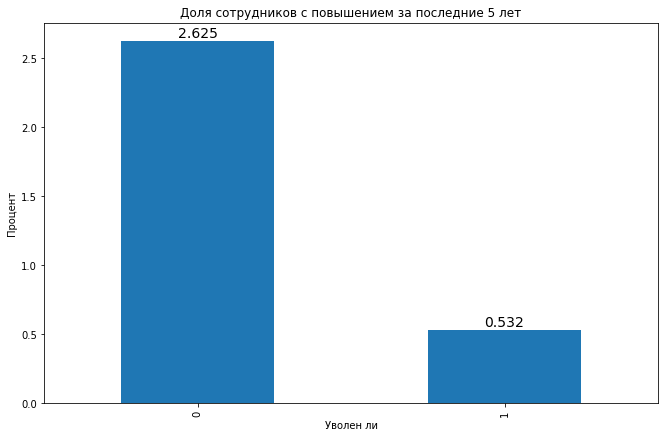

In [26]:
# всего в каждой группе
data_count = df[['left', 'promotion_last_5years']].groupby(['left']).count()

# берем с повышением
data = df[['left', 'promotion_last_5years']].loc[df['promotion_last_5years'] == 1]

data = data.groupby(['left']).size()*100/data_count['promotion_last_5years']

data.plot(kind='bar', 
          title='Доля сотрудников с повышением за последние 5 лет',
          xlabel='Уволен ли',
          ylabel='Процент')

for i, val in enumerate(data.values):
    plt.text(i, val, round(val, 3), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Средняя степень удовлетворенности

In [27]:
data = df[['satisfaction_level', 'left']].groupby('left').mean()
data

,satisfaction_level
left,
0,0.666810
1,0.440098


Среднее количество проектов

In [28]:
data = df[['number_project', 'left']].groupby('left').mean()
data

,number_project
left,
0,3.786664
1,3.855503


###Задание 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [29]:
# убираем данные, которые не будем использовать
df.drop(['department', 'salary'], axis=1, inplace=True)

In [30]:
X = df
y = pd.array(df['left'])

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [31]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
11995,0,0
11996,0,0
11997,0,0
11998,0,0


In [33]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7613333333333333

Точность модели низкая, что говорит о ее низком качестве. Выбранные критерии слабо влияют на решение сотрудника об увольнении